### Importing Libraries

In [1]:
import pandas as pd
import os
import re
import json
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.mode.chained_assignment = None

### Variables

In [3]:
input_folder = './InputData/'
output_folder = './OutputData/'

if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [4]:
animes = pd.read_csv(input_folder + 'animes.csv')
profiles = pd.read_csv(input_folder + 'profiles.csv')
reviews = pd.read_csv(input_folder + 'reviews.csv')

### Table of Contents

* [DataFrame de Animes](#chapter1)
    * [Input DF Animes](#section_1_1)
    * [Output DF Animes](#section_1_2)

* [DataFrame de Profiles](#chapter2)
    * [Input DF Profiles](#section_2_1)
    * [Output DF Profiles](#section_2_2)

* [DataFrame de Reviews](#chapter3)
    * [Input DF Reviews](#section_3_1)
    * [Output DF Reviews](#section_3_2)

### DataFrame de Animes <a class="anchor" id="chapter1"></a>

#### Input DF Animes <a class="anchor" id="section_1_1"></a>

In [5]:
animes.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [6]:
animes.columns

Index(['uid', 'title', 'synopsis', 'genre', 'aired', 'episodes', 'members',
       'popularity', 'ranked', 'score', 'img_url', 'link'],
      dtype='object')

In [7]:
print('Hay información sobre {} animes.'.format(animes.shape[0]))
animes.dtypes

Hay información sobre 19311 animes.


uid             int64
title          object
synopsis       object
genre          object
aired          object
episodes      float64
members         int64
popularity      int64
ranked        float64
score         float64
img_url        object
link           object
dtype: object

El dataset contiene información específica sobre diversos animes. A continuación se va a realizar la eliminación de filas duplicadas por si acaso hubiera animes repetidos.

In [8]:
animes_v2 = animes.drop_duplicates(keep='first', ignore_index=True)
print('Hay información sobre {} diferentes animes.'.format(animes_v2.shape[0]))

Hay información sobre 16368 diferentes animes.


In [9]:
animes_v2[['ranked', 'episodes', 'score', 'members', 'popularity']].describe()

,ranked,episodes,score,members,popularity
count,14611.000000,15825.000000,15964.000000,1.636800e+04,16368.000000
mean,7311.196701,11.658578,6.350745,2.766506e+04,8131.919599
std,4243.135518,48.853601,0.975120,9.364677e+04,4714.683351
min,1.000000,1.000000,1.250000,2.500000e+01,1.000000
25%,3623.500000,1.000000,5.700000,2.970000e+02,4042.500000
50%,7316.000000,2.000000,6.380000,1.879000e+03,8115.000000
75%,10978.500000,12.000000,7.050000,1.190100e+04,12208.250000
max,14675.000000,3057.000000,9.230000,1.871043e+06,16338.000000


A través de la función describe se han analizado los valores de las columnas ranked y popularity, que corresponden a los números en el ranking y en la popularidad de los distintos animes, sin embargo, como no se sabe cómo han sido asignados estos valores se ha decidido descartar estas columnas y realizar el ranking y la popularidad a partir de las columnas score y members, que contienen la puntuación y el número de miembros del anime dentro de la comunidad, respectivamente.

In [10]:
animes_v2.isnull().any()

uid           False
title         False
synopsis       True
genre         False
aired         False
episodes       True
members       False
popularity    False
ranked         True
score          True
img_url        True
link          False
dtype: bool

Se ha obtenido que existen columnas que tienen valores nulos como por ejemplo la columna score, sin embargo, se ha decidido no realizar ningún tipo de conversión. Es importante destacar que la columna title no tiene valores nulos, en caso contrario, habría que haber eliminado dichos valores.

In [11]:
animes_v2.loc[:,'fec'] = animes_v2.loc[:,'aired'].apply(lambda x: re.findall(r'\d{4}', x))
animes_v2.loc[:,'fec_ini'] = animes_v2.loc[:,'fec'].apply(lambda x: x[0] if len(x) > 0 else '?')
animes_v2.loc[:,'fec_fin'] = animes_v2.loc[:,'fec'].apply(lambda x: x[1] if len(x)==2 else '?')

La columna aired representa la fecha de publicación del anime en MyAnimeList. Se ha visualizado que consta de fecha de inicio de publicación seguido de una coma y a continuación la fecha de fin de publicación. El formato de ambas fechas está formado primero por el mes seguido del día y finalmente el año, por lo que para obtener los años de inicio y fin se ha extraído todos los números que tuvieran exactamente cuatro dígitos, con el objetivo de obtener únicamente los años de publicación.

In [12]:
animes_v2[['aired', 'fec', 'fec_ini', 'fec_fin']].head()

,aired,fec,fec_ini,fec_fin
0,"Oct 4, 2015 to Mar 27, 2016","[2015, 2016]",2015,2016
1,"Oct 10, 2014 to Mar 20, 2015","[2014, 2015]",2014,2015
2,"Jul 7, 2017 to Sep 29, 2017","[2017, 2017]",2017,2017
3,"Apr 5, 2009 to Jul 4, 2010","[2009, 2010]",2009,2010
4,"Jan 6, 2017",[2017],2017,?


In [13]:
animes_v3 = animes_v2.fillna('?')

Se ha decidido rellenar los valores nulos con ?.

In [14]:
columns = ['uid', 'title', 'synopsis', 'genre', 'episodes', 'members',
           'score', 'link', 'fec_ini', 'fec_fin']
animes_v4 = animes_v3[columns]

In [15]:
animes_v4['genre'].head()

0    ['Comedy', 'Sports', 'Drama', 'School', 'Shoun...
1    ['Drama', 'Music', 'Romance', 'School', 'Shoun...
2    ['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...
3    ['Action', 'Military', 'Adventure', 'Comedy', ...
4     ['Action', 'Mystery', 'Supernatural', 'Vampire']
Name: genre, dtype: object

Dentro de la columna genre se encuentran los géneros a los que pertenecen cada anime, sin embargo, los valores de esta columna contiene múltiples géneros cinematográficos  por lo que se ha decidido expandirlo a múltiples columnas con el objetivo de obtener un acceso más rápido.

In [16]:
animes_v4.loc[:,'list_genres'] = animes_v4.loc[:,'genre'].apply(
    lambda x: re.sub(r"[^a-zA-Z,]", "", x).split(','))

In [17]:
animes_v4['list_genres']

0                 [Comedy, Sports, Drama, School, Shounen]
1                 [Drama, Music, Romance, School, Shounen]
2              [SciFi, Adventure, Mystery, Drama, Fantasy]
3        [Action, Military, Adventure, Comedy, Drama, M...
4                 [Action, Mystery, Supernatural, Vampire]
                               ...                        
16363    [Action, Comedy, SuperPower, MartialArts, Shou...
16364                  [SliceofLife, Comedy, Supernatural]
16365                       [SliceofLife, Comedy, Shounen]
16366                                             [Action]
16367        [Comedy, Drama, Romance, School, SliceofLife]
Name: list_genres, Length: 16368, dtype: object

In [18]:
list_genres = []
for i in range(animes_v4.shape[0]):
    list_genres.extend(animes_v4['list_genres'][i])

total_genres = set(list_genres)
print(total_genres)

{'SliceofLife', 'Magic', 'Shounen', '', 'Music', 'SuperPower', 'Samurai', 'Adventure', 'Comedy', 'Parody', 'Police', 'ShounenAi', 'Mystery', 'MartialArts', 'Space', 'Seinen', 'Yaoi', 'Cars', 'Harem', 'Demons', 'Game', 'ShoujoAi', 'Shoujo', 'Mecha', 'Fantasy', 'Historical', 'Horror', 'SciFi', 'Josei', 'Hentai', 'Romance', 'Psychological', 'Kids', 'Supernatural', 'Ecchi', 'Military', 'Thriller', 'School', 'Action', 'Dementia', 'Drama', 'Vampire', 'Yuri', 'Sports'}


Las columnas se han definido con valores binarios, es decir, se les ha asignado el valor 1 si el género correspondiente se encuentra dentro de la columna list_genres y 0 en caso contrario.

In [19]:
for genre in total_genres:
    if genre != '':
        animes_v4.loc[:, genre] = animes_v4.loc[:, 'list_genres'].apply(
            lambda x: 1 if genre in x else 0)

In [20]:
animes_v4.columns

Index(['uid', 'title', 'synopsis', 'genre', 'episodes', 'members', 'score',
       'link', 'fec_ini', 'fec_fin', 'list_genres', 'SliceofLife', 'Magic',
       'Shounen', 'Music', 'SuperPower', 'Samurai', 'Adventure', 'Comedy',
       'Parody', 'Police', 'ShounenAi', 'Mystery', 'MartialArts', 'Space',
       'Seinen', 'Yaoi', 'Cars', 'Harem', 'Demons', 'Game', 'ShoujoAi',
       'Shoujo', 'Mecha', 'Fantasy', 'Historical', 'Horror', 'SciFi', 'Josei',
       'Hentai', 'Romance', 'Psychological', 'Kids', 'Supernatural', 'Ecchi',
       'Military', 'Thriller', 'School', 'Action', 'Dementia', 'Drama',
       'Vampire', 'Yuri', 'Sports'],
      dtype='object')

In [21]:
animes_v4[['title', 'list_genres', 'School', 'Sports', 'Comedy', 'Action', 'Shounen']].head()

,title,list_genres,School,Sports,Comedy,Action,Shounen
0,Haikyuu!! Second Season,"[Comedy, Sports, Drama, School, Shounen]",1,1,1,0,1
1,Shigatsu wa Kimi no Uso,"[Drama, Music, Romance, School, Shounen]",1,0,0,0,1
2,Made in Abyss,"[SciFi, Adventure, Mystery, Drama, Fantasy]",0,0,0,0,0
3,Fullmetal Alchemist: Brotherhood,"[Action, Military, Adventure, Comedy, Drama, M...",0,0,1,1,1
4,Kizumonogatari III: Reiketsu-hen,"[Action, Mystery, Supernatural, Vampire]",0,0,0,1,0


A continuación se obtienen los diez géneros más comunes. Se ha decidido no eliminar ninguna de las columnas de los géneros en vez de seleccionar unicamente las de los géneros más comunes.

In [22]:
c = Counter(list_genres)
c.most_common(10)

[('Comedy', 5683),
 ('Action', 3620),
 ('Fantasy', 3012),
 ('Adventure', 2770),
 ('Drama', 2489),
 ('SciFi', 2486),
 ('Kids', 2460),
 ('Shounen', 1934),
 ('Music', 1869),
 ('Romance', 1786)]

In [23]:
animes_v4.loc[:,'genres'] = animes_v4.loc[:,'list_genres'].apply(
    lambda x: str(x).replace("[", "").replace("]", ""))

Se ha creado una nueva columna llamada genres resultado de la eliminación de los corchetes de la columna list_genres, con el objetivo de dejar ese atributo como un string puro y que sea más fácil a la hora de utilizarlo en Neo4j.

In [24]:
animes_v5 = animes_v4.copy()
animes_v5.drop(columns=['genre', 'list_genres'], inplace=True)

#### Output DF Animes <a class="anchor" id="section_1_2"></a>

In [25]:
animes_v5.head()

,uid,title,synopsis,episodes,members,score,link,fec_ini,fec_fin,SliceofLife,...,Military,Thriller,School,Action,Dementia,Drama,Vampire,Yuri,Sports,genres
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,25.0,489888,8.82,https://myanimelist.net/anime/28891/Haikyuu_Se...,2015,2016,0,...,0,0,1,0,0,1,0,0,1,"'Comedy', 'Sports', 'Drama', 'School', 'Shounen'"
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,22.0,995473,8.83,https://myanimelist.net/anime/23273/Shigatsu_w...,2014,2015,0,...,0,0,1,0,0,1,0,0,0,"'Drama', 'Music', 'Romance', 'School', 'Shounen'"
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,13.0,581663,8.83,https://myanimelist.net/anime/34599/Made_in_Abyss,2017,2017,0,...,0,0,0,0,0,1,0,0,0,"'SciFi', 'Adventure', 'Mystery', 'Drama', 'Fan..."
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...",64.0,1615084,9.23,https://myanimelist.net/anime/5114/Fullmetal_A...,2009,2010,0,...,1,0,0,1,0,1,0,0,0,"'Action', 'Military', 'Adventure', 'Comedy', '..."
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,1.0,214621,8.83,https://myanimelist.net/anime/31758/Kizumonoga...,2017,?,0,...,0,0,0,1,0,0,1,0,0,"'Action', 'Mystery', 'Supernatural', 'Vampire'"


In [26]:
animes_v5.shape

(16368, 53)

In [27]:
animes_v5.columns

Index(['uid', 'title', 'synopsis', 'episodes', 'members', 'score', 'link',
       'fec_ini', 'fec_fin', 'SliceofLife', 'Magic', 'Shounen', 'Music',
       'SuperPower', 'Samurai', 'Adventure', 'Comedy', 'Parody', 'Police',
       'ShounenAi', 'Mystery', 'MartialArts', 'Space', 'Seinen', 'Yaoi',
       'Cars', 'Harem', 'Demons', 'Game', 'ShoujoAi', 'Shoujo', 'Mecha',
       'Fantasy', 'Historical', 'Horror', 'SciFi', 'Josei', 'Hentai',
       'Romance', 'Psychological', 'Kids', 'Supernatural', 'Ecchi', 'Military',
       'Thriller', 'School', 'Action', 'Dementia', 'Drama', 'Vampire', 'Yuri',
       'Sports', 'genres'],
      dtype='object')

In [28]:
animes_v5.to_csv(output_folder + 'animes.csv', index=False)

### DataFrame de Profiles <a class="anchor" id="chapter2"></a>

#### Input DF Profiles <a class="anchor" id="section_2_1"></a>

In [29]:
profiles.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,"Oct 2, 1994","['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"Nov 10, 2000","['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep 5,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"Oct 30, 1999","['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [30]:
print('Hay {} perfiles de usuarios.'.format(profiles.shape[0]))
profiles.dtypes

Hay 81727 perfiles de usuarios.


profile            object
gender             object
birthday           object
favorites_anime    object
link               object
dtype: object

El fichero contiene información sobre los perfiles de los usuarios de la comunidad de MyAnimeList. A continuación se han eliminado aquellas filas que estaban duplicadas.

In [31]:
profiles_v2 = profiles.drop_duplicates(keep='first', ignore_index=True)
print('Hay {} perfiles distintos.'.format(profiles_v2.shape[0]))

Hay 47902 perfiles distintos.


In [32]:
profiles_v2.isnull().any()

profile            False
gender              True
birthday            True
favorites_anime    False
link               False
dtype: bool

Se ha obtenido que solamente las columnas gender  y birthday tienen valores nulos, por lo que se ha definido un nuevo dataset profiles_v3 donde los datos nulos han sido rellenados con el valor X, para poder seguir investigando el contenido de los datos.

In [33]:
profiles_v2.gender.unique()

array(['Male', 'Female', nan, 'Non-Binary'], dtype=object)

In [34]:
profiles_v3 = profiles_v2.fillna(value='X')

Se ha identificado que existen perfiles que no tienen ningún anime favorito, es decir, que el campo favorites_anime se encuentra vacío, por lo que no ayudarían al sistema de recomendación y como no son de utilidad se ha decidido eliminarlos.

In [35]:
profiles_v3.loc[:,'empty_list'] = profiles_v3.loc[:, 'favorites_anime'].apply(
    lambda x: True if len(x)==2 else False)

In [36]:
profiles_v3[['favorites_anime', 'empty_list']]

,favorites_anime,empty_list
0,"['33352', '25013', '5530', '33674', '1482', '2...",False
1,"['11061', '31964', '853', '20583', '918', '925...",False
2,"['918', '2904', '11741', '17074', '23273', '32...",False
3,"['5680', '849', '2904', '3588', '37349']",False
4,"['4181', '7791', '9617', '5680', '2167', '4382...",False
...,...,...
47897,[],True
47898,"['37510', '35180', '30', '31043', '5081', '374...",False
47899,[],True
47900,[],True


In [37]:
profiles_v4 = profiles_v3[profiles_v3['empty_list'] == False]
print('Hay información de {} perfiles activos'.format(profiles_v4.shape[0]))

Hay información de 37478 perfiles activos


Se ha analizado la importancia de la variable birthday. Debido a que cada usuario ha rellenado de una forma diferente la fecha de cumpleaños, se ha intentado obtener el año de nacimiento extrayendo los números que constan exactamente de cuatro dígitos seguidos y si no se consigue se ha rellenado con una interrogación,

In [38]:
def regex_extract(x):
    try:
        pattern = r'\d{4}'
        result = re.findall(pattern, x)
        return int(result[0])
    except:
        return '?'

profiles_v4.loc[:,'year_birthday'] = profiles_v4.loc[:, 'birthday'].apply(regex_extract)

In [39]:
profiles_v4[['birthday', 'year_birthday']].head()

,birthday,year_birthday
0,"Oct 2, 1994",1994
1,"Nov 10, 2000",2000
2,X,?
3,Sep 5,?
4,"Oct 30, 1999",1999


In [40]:
profiles_v4.loc[:, 'list_favorites'] = profiles_v4.loc[:,'favorites_anime'].apply(
    lambda x: re.sub(r"[^0-9,]", "", x).split(','))

profiles_v4.loc[:, 'list_favorites'] = profiles_v4.loc[:,'list_favorites'].apply(
    lambda x: [int(y) for y in x])

In [41]:
profiles_v4[['favorites_anime', 'list_favorites']].head()

,favorites_anime,list_favorites
0,"['33352', '25013', '5530', '33674', '1482', '2...","[33352, 25013, 5530, 33674, 1482, 269, 18245, ..."
1,"['11061', '31964', '853', '20583', '918', '925...","[11061, 31964, 853, 20583, 918, 9253, 34599, 3..."
2,"['918', '2904', '11741', '17074', '23273', '32...","[918, 2904, 11741, 17074, 23273, 32281, 9989, ..."
3,"['5680', '849', '2904', '3588', '37349']","[5680, 849, 2904, 3588, 37349]"
4,"['4181', '7791', '9617', '5680', '2167', '4382...","[4181, 7791, 9617, 5680, 2167, 4382, 849, 235,..."


Se han agrupado los valores por la columna gender con el objetivo de realizar un conteo de filas.

In [42]:
profiles_v4.loc[:,'total_favorites'] = profiles_v4.loc[:, 'list_favorites'].apply(lambda x: len(x))

In [43]:
(profiles_v4.groupby('gender').count()['profile'] / profiles_v4.shape[0]) * 100

gender
Female        22.426490
Male          50.656385
Non-Binary     0.960564
X             25.956561
Name: profile, dtype: float64

<AxesSubplot:xlabel='gender'>

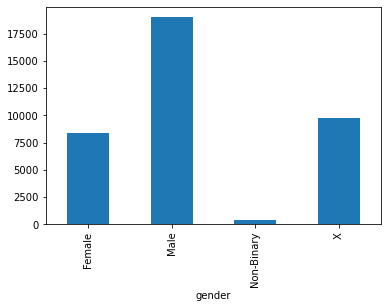

In [44]:
profiles_v4.groupby('gender').count()['total_favorites'].plot(kind='bar')

Los resultados muestran que el 50% de los usuarios de la comunidad son hombres, mientras que las mujeres solamente corresponden un 22%, lo que implica una buena información para poder agrupar los perfiles por su género. Hay menos de un 1% de usuarios que no han querido definir su sexo, sin embargo, hay un 26% de usuarios que no han querido rellenar el valor de sexo. Adicionalmente, se ha querido analizar la información que aportan los tipos de géneros en cuanto al número de favoritos y se ha realizado un gráfico para obtener la media del valor total_favorites, calculado previamente.

<AxesSubplot:xlabel='gender'>

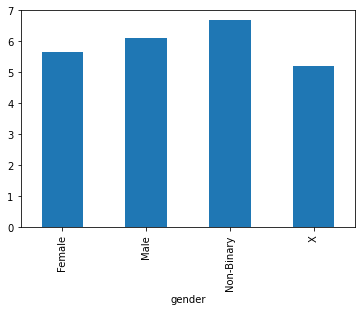

In [45]:
profiles_v4.groupby('gender').mean()['total_favorites'].plot(kind='bar')

<AxesSubplot:xlabel='year_birthday'>

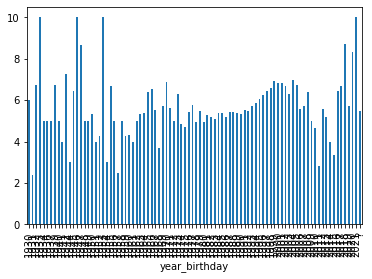

In [46]:
profiles_v4.groupby('year_birthday').mean()['total_favorites'].plot(kind='bar')

Como intentar agrupar a todos los usuarios con la misma edad es complicado debido a los diversos valores que puede haber, se han asignado a los usuarios a un grupo de edad dependiendo del año de nacimiento.

In [47]:
def edad_range(x):
    if x == '?':
        return x
    else:
        edad = 2022 - int(x)
        if edad >=0 and edad < 16:
            return 'Q1'
        elif edad >=16 and edad < 32:
            return 'Q2'
        elif edad >=32 and edad < 50:
            return 'Q3'
        else:
            return 'Q4'

profiles_v4.loc[:,'range'] = profiles_v4.loc[:,'year_birthday'].apply(edad_range)

<AxesSubplot:xlabel='range'>

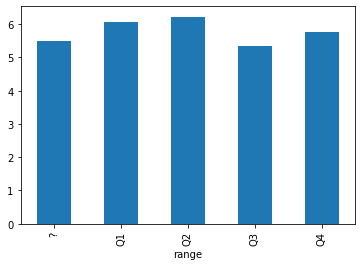

In [48]:
profiles_v4.groupby('range').mean()['total_favorites'].plot(kind='bar')

<AxesSubplot:xlabel='range'>

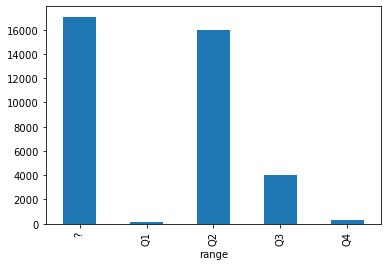

In [49]:
profiles_v4.groupby('range').count()['total_favorites'].plot(kind='bar')

In [50]:
(profiles_v4.groupby('range').count()['profile'] / profiles_v4.shape[0]) * 100

range
?     45.557394
Q1     0.397567
Q2    42.667698
Q3    10.619563
Q4     0.757778
Name: profile, dtype: float64

Los resultados obtenidos muestran que un 45% de los usuarios pertenecen al grupo ?, por lo que se está perdiendo información, además el grupo Q2 se encuentra presente en el 42% de los usuarios por lo que casi un 89% de los usuarios o están entre 16 y 32 años o no han rellenado correctamente su edad. Aunque la información sobre el número medio de favoritos que aporta cada grupo de edad es similar, se ha decidido eliminar la variable de la edad de un usuario.

In [51]:
df_gender = profiles_v4[['profile', 'gender', 'list_favorites', 'total_favorites']]
df_gender.head()

,profile,gender,list_favorites,total_favorites
0,DesolatePsyche,Male,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",20
1,baekbeans,Female,"[11061, 31964, 853, 20583, 918, 9253, 34599, 3...",10
2,skrn,X,"[918, 2904, 11741, 17074, 23273, 32281, 9989, ...",9
3,edgewalker00,Male,"[5680, 849, 2904, 3588, 37349]",5
4,aManOfCulture99,Male,"[4181, 7791, 9617, 5680, 2167, 4382, 849, 235,...",10


Para poder seguir analizando la influencia de la variable genre se ha investigado si los distintos tipos de sexos presentan preferencias sobre los géneros de los animes, para ello se ha escogido los diez géneros más comunes que se han obtenido en la sección anterior.

In [52]:
top_genres = ['Comedy','Action','Fantasy','Adventure','Drama','SciFi',
              'Kids','Shounen','Music','Romance']

In [53]:
def get_total_genres(x, genre):
    total = 0
    for favorite in x:
        try:
            total += animes_v5[animes_v5['uid'] == favorite][genre].sum()
        except:
            total += 0
    return total

for genre in top_genres:
    df_gender.loc[:, genre] = df_gender.loc[:,'list_favorites'].apply(get_total_genres, args=(genre,))

In [54]:
df_gender.head()

,profile,gender,list_favorites,total_favorites,Comedy,Action,Fantasy,Adventure,Drama,SciFi,Kids,Shounen,Music,Romance
0,DesolatePsyche,Male,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",20,9,8,5,8,9,2,0,6,2,9
1,baekbeans,Female,"[11061, 31964, 853, 20583, 918, 9253, 34599, 3...",10,6,5,3,2,2,4,0,5,0,2
2,skrn,X,"[918, 2904, 11741, 17074, 23273, 32281, 9989, ...",9,3,3,3,1,5,3,0,2,1,4
3,edgewalker00,Male,"[5680, 849, 2904, 3588, 37349]",5,3,3,2,1,1,2,0,1,1,0
4,aManOfCulture99,Male,"[4181, 7791, 9617, 5680, 2167, 4382, 849, 235,...",10,8,0,0,1,4,2,0,1,3,3


<AxesSubplot:xlabel='gender'>

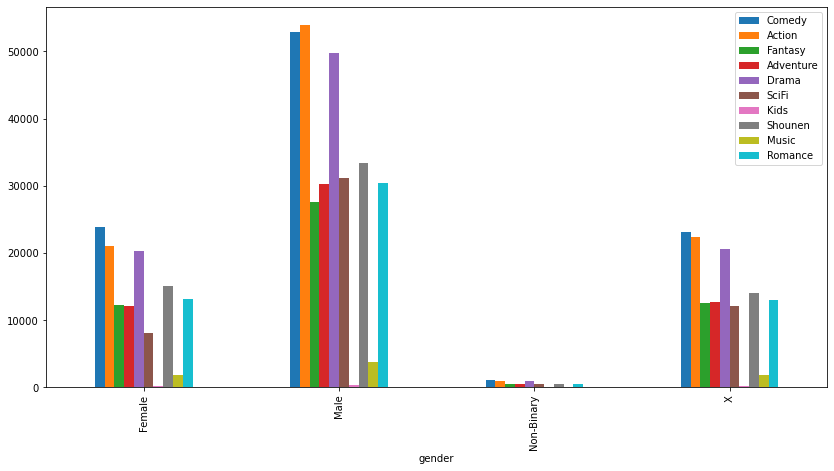

In [55]:
df_gender.groupby('gender').sum()[top_genres].plot(kind='bar', figsize=(14,7))

El gráfico ha sido redimensionado debido a que como se tiene más información para el género Male consecuentemente los resultados son más altos para éstos.

In [56]:
agrup = df_gender.groupby('gender').sum()[top_genres]
agrup

,Comedy,Action,Fantasy,Adventure,Drama,SciFi,Kids,Shounen,Music,Romance
gender,,,,,,,,,,
Female,23893,21105,12310,12161,20266,8100,218,15134,1850,13127
Male,52926,53919,27623,30333,49755,31148,362,33438,3819,30465
Non-Binary,1129,919,556,570,957,525,14,557,109,498
X,23099,22376,12502,12757,20619,12087,226,14119,1791,12933


In [57]:
conteo = df_gender.groupby('gender').count()['profile']

In [58]:
agrup.iloc[0] = agrup.iloc[0] / conteo['Female']
agrup.iloc[1] = agrup.iloc[1] / conteo['Male']
agrup.iloc[2] = agrup.iloc[2] / conteo['Non-Binary']
agrup.iloc[3] = agrup.iloc[3] / conteo['X']
agrup

,Comedy,Action,Fantasy,Adventure,Drama,SciFi,Kids,Shounen,Music,Romance
gender,,,,,,,,,,
Female,2.842713,2.511005,1.464604,1.446877,2.411184,0.963712,0.025937,1.800595,0.220107,1.561808
Male,2.787780,2.840084,1.454991,1.597735,2.620753,1.640664,0.019068,1.761285,0.201159,1.604688
Non-Binary,3.136111,2.552778,1.544444,1.583333,2.658333,1.458333,0.038889,1.547222,0.302778,1.383333
X,2.374486,2.300164,1.285156,1.311369,2.119552,1.242496,0.023232,1.451377,0.184108,1.329461


<AxesSubplot:xlabel='gender'>

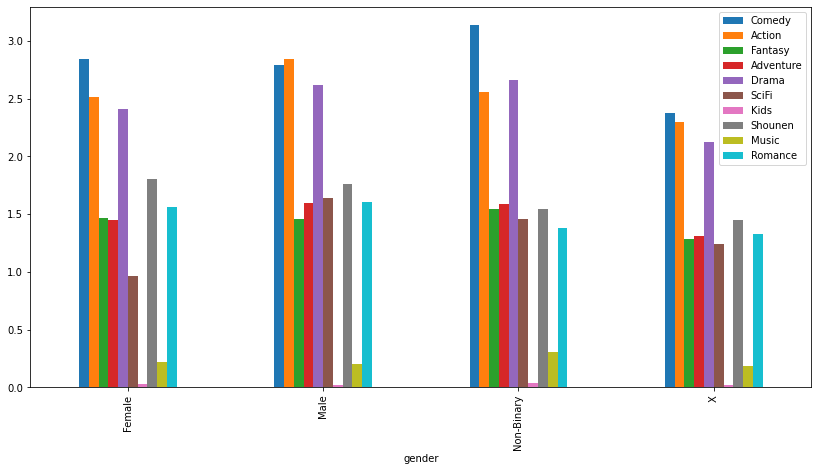

In [59]:
agrup.plot(kind='bar', figsize=(14,7))

Se observa gráficamente que el género que predomina en las mujeres es el de Comedia, sin embargo, en los hombres los géneros más influyentes son primero la acción y segundo la comedia. Debido a los resultados obtenidos se ha decidido tener en cuenta la información de la variable gender para la construcción del grafo.

In [60]:
columns = ['profile', 'gender', 'list_favorites', 'link']
profiles_v5 = profiles_v4[columns]
profiles_v5.head()

,profile,gender,list_favorites,link
0,DesolatePsyche,Male,"[33352, 25013, 5530, 33674, 1482, 269, 18245, ...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,"[11061, 31964, 853, 20583, 918, 9253, 34599, 3...",https://myanimelist.net/profile/baekbeans
2,skrn,X,"[918, 2904, 11741, 17074, 23273, 32281, 9989, ...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,"[5680, 849, 2904, 3588, 37349]",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,"[4181, 7791, 9617, 5680, 2167, 4382, 849, 235,...",https://myanimelist.net/profile/aManOfCulture99


#### Output DF Profiles <a class="anchor" id="section_2_2"></a>

In [61]:
profiles_v5.columns

Index(['profile', 'gender', 'list_favorites', 'link'], dtype='object')

In [62]:
profiles_v5.shape

(37478, 4)

In [63]:
profiles_v5.to_csv(output_folder + 'profiles.csv', index=False)

### DataFrame de Reviews <a class="anchor" id="chapter3"></a>

#### Input DF Reviews <a class="anchor" id="section_3_1"></a>

In [64]:
reviews.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [65]:
print('Hay {} reseñas de usuarios'.format(reviews.shape[0]))
reviews.dtypes

Hay 192112 reseñas de usuarios


uid           int64
profile      object
anime_uid     int64
text         object
score         int64
scores       object
link         object
dtype: object

El dataset contiene información sobre las reviews que han hecho los usuarios a algún anime. 

In [66]:
reviews.isnull().any()

uid          False
profile      False
anime_uid    False
text         False
score        False
scores       False
link         False
dtype: bool

In [67]:
reviews_v2 = reviews.drop_duplicates(keep='first', ignore_index=True)
print('Hay {} reseñas distintas de usuarios'.format(reviews_v2.shape[0]))

Hay 130519 reseñas distintas de usuarios


Se ha analizado el contenido de la columna scores ya que a priori los valores parecen tener el formato de un fichero json, por lo que se ha forzado a que tengan ese formato.

In [68]:
reviews_v2.loc[:,'dict_scores'] = reviews_v2.loc[:, 'scores'].apply(
    lambda x: json.loads(x.replace("'", '"')))

In [69]:
base = reviews_v2['dict_scores'].values[0]
print(base.keys())

dict_keys(['Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment'])


Observando los resultados existen seis tipos de campos donde se han realizado puntuaciones, por lo que es una información importante para poder ser utilizada. Para poder usarla de un modo más sencillo se ha decidido pasar los tipos de campo a columnas propias, ya que su accesibilidad sería más práctica a la hora de utilizarlo en Neo4j.

In [70]:
for key in base.keys():
    reviews_v2.loc[:, key] = reviews_v2.loc[:,'dict_scores'].apply(lambda x: int(x[key]))

In [71]:
reviews_v2.columns

Index(['uid', 'profile', 'anime_uid', 'text', 'score', 'scores', 'link',
       'dict_scores', 'Overall', 'Story', 'Animation', 'Sound', 'Character',
       'Enjoyment'],
      dtype='object')

In [72]:
reviews_v2.head()

,uid,profile,anime_uid,text,score,scores,link,dict_scores,Overall,Story,Animation,Sound,Character,Enjoyment
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,"{'Overall': '8', 'Story': '8', 'Animation': '8...",8,8,8,10,9,8
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,"{'Overall': '10', 'Story': '10', 'Animation': ...",10,10,10,10,10,10
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,"{'Overall': '7', 'Story': '7', 'Animation': '9...",7,7,9,8,8,8
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254,"{'Overall': '9', 'Story': '9', 'Animation': '9...",9,9,9,10,10,9
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149,"{'Overall': '10', 'Story': '10', 'Animation': ...",10,10,8,9,10,10


Se ha analizado si pudiese haber relación entre la columna score, definida como la puntuación global, y la columna Overall.

In [73]:
reviews_v2.loc[:,'check'] = reviews_v2.loc[:,'score']==reviews_v2.loc[:, 'Overall']

In [74]:
reviews_v2[reviews_v2.loc[:, 'check'] == False].shape[0]

0

In [75]:
columns = ['profile', 'anime_uid', 'Overall', 'Story', 'Animation', 'Sound', 'Character', 'Enjoyment']
reviews_v3 = reviews_v2[columns]

#### Output DF Reviews <a class="anchor" id="section_3_2"></a>

In [76]:
reviews_v3.head()

,profile,anime_uid,Overall,Story,Animation,Sound,Character,Enjoyment
0,DesolatePsyche,34096,8,8,8,10,9,8
1,baekbeans,34599,10,10,10,10,10,10
2,skrn,28891,7,7,9,8,8,8
3,edgewalker00,2904,9,9,9,10,10,9
4,aManOfCulture99,4181,10,10,8,9,10,10


In [77]:
reviews_v3.columns

Index(['profile', 'anime_uid', 'Overall', 'Story', 'Animation', 'Sound',
       'Character', 'Enjoyment'],
      dtype='object')

In [78]:
reviews_v3.shape

(130519, 8)

In [79]:
reviews_v3.to_csv(output_folder + 'reviews.csv', index=False)